In [75]:
import matplotlib.pyplot as plt

import openmc
from openmc.deplete import Results
from openmc.deplete.abc import _SECONDS_PER_MINUTE, _SECONDS_PER_HOUR, _SECONDS_PER_DAY
integrator_types = ('predictor', 'cecm')
time_types = [('minutes', _SECONDS_PER_MINUTE, 'minutes'), 
              ('hours', _SECONDS_PER_HOUR, 'hours'),
              ('days', _SECONDS_PER_DAY, 'days'),
              ('months', _SECONDS_PER_DAY, 'days')]
normalization_types = ('source_rate', 'fission_q')
depletion_types = [('simple', '../openmc/tests/chain_simple.xml'), ('full', 'chain_endbf71_pwr.xml')]


In [82]:
time_type = 3
integrator_type = 0
normalization_type = 0
depletion_type = 0

time_type, time_scale_factor, time_unit = time_types[time_type]
integrator_type = integrator_types[integrator_type]
normalization_type = normalization_types[normalization_type]
depletion_type, chain_file = depletion_types[depletion_type]

case1_results = Results(f'case1/{integrator_type}/{depletion_type}_depletion_results_{time_type}.h5')
case2_results = Results(f'case2/{integrator_type}/{depletion_type}_depletion_results_{time_type}.h5')

path = f'case3/{integrator_type}/{depletion_type}_depletion_results_{time_type}_'
case3_results = Results()
for i in range(0,11):
    case3_results.append(Results(path + f'{i}.h5')[0])

t = results0[0].time
for i, res in enumerate(case3_results):
    times = [0,0]
    times[0] = t[1] * i
    times[1] = t[1] * (i+1)
    res.time = times
        
time, _ = case1_results.get_atoms("1", "U235")
time /= time_scale_factor
chain = openmc.deplete.Chain.from_xml(chain_file)

atoms_dict = {}
rx_dict = {}
for nuc in chain.nuclides:
    nuc_name = nuc.name
    atoms = (case1_results.get_atoms("1", nuc_name)[1], 
             case2_results.get_atoms("1", nuc_name)[1],
             case3_results.get_atoms("1", nuc_name)[1])
    atoms_dict[nuc_name] = atoms
    rx_dict.update({nuc_name: {}})
    for rx in nuc.reactions:
        rx_name = rx.type
        reactions = (case1_results.get_reaction_rate('1', nuc_name, rx_name)[1],
                     case2_results.get_reaction_rate('1', nuc_name, rx_name)[1],
                     case3_results.get_reaction_rate('1', nuc_name, rx_name)[1])
        rx_dict[nuc_name].update({rx_name: reactions})
        
atoms_dict.keys()

dict_keys(['I135', 'Xe135', 'Xe136', 'Cs135', 'Gd157', 'Gd156', 'U234', 'U235', 'U238'])

In [93]:
case3_results

[<StepResult: t=0.0, dt=2592000.0, source=174.0>,
 <StepResult: t=2592000.0, dt=2592000.0, source=174.0>,
 <StepResult: t=5184000.0, dt=2592000.0, source=174.0>,
 <StepResult: t=7776000.0, dt=2592000.0, source=174.0>,
 <StepResult: t=10368000.0, dt=2592000.0, source=174.0>,
 <StepResult: t=12960000.0, dt=2592000.0, source=174.0>,
 <StepResult: t=15552000.0, dt=2592000.0, source=174.0>,
 <StepResult: t=18144000.0, dt=2592000.0, source=174.0>,
 <StepResult: t=20736000.0, dt=2592000.0, source=174.0>,
 <StepResult: t=23328000.0, dt=2592000.0, source=174.0>,
 <StepResult: t=25920000.0, dt=2592000.0, source=174.0>]

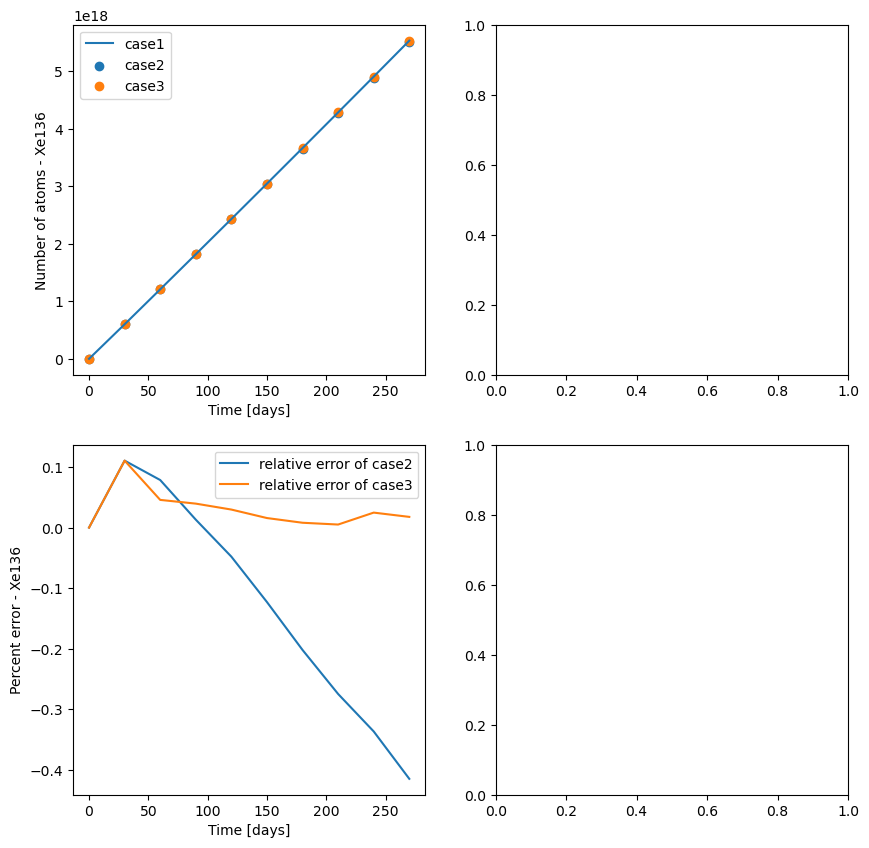

In [80]:
nuc = 'Xe136'
#rx = '(n,gamma)'
i = -1
j = -1
c1_atoms, c2_atoms, c3_atoms = atoms_dict[nuc]
#c1_nuc_rx, c2_nuc_rx, c3_nuc_rx = rx_dict[nuc][rx]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1.plot(time[:i], c1_atoms[:i], label="case1")
ax1.scatter(time[:i], c2_atoms[:i], label="case2")
ax1.scatter(time[:i], c3_atoms[:i], label="case3")
ax1.set_xlabel(f"Time [{time_unit}]")
ax1.set_ylabel(f"Number of atoms - {nuc}");
ax1.legend()

at_error21 = 100 * (c2_atoms - c1_atoms) / c1_atoms
at_error31 = 100 * (c3_atoms - c1_atoms) / c1_atoms
at_error23 = 100 * (c2_atoms - c3_atoms) / c3_atoms
ax3.plot(time[:j], at_error21[:j], label="relative error of case2")
ax3.plot(time[:j], at_error31[:j], label="relative error of case3")
ax3.set_xlabel(f"Time [{time_unit}]")
ax3.set_ylabel(f"Percent error - {nuc}")
ax3.legend()

#ax2.plot(time[:i], c1_nuc_rx[:i], label="case1")
#ax2.scatter(time[:i], c2_nuc_rx[:i], label="case2")
#ax2.scatter(time[:i], c3_nuc_rx[:i], label="case3")
#ax2.set_xlabel(f"Time [{time_unit}]")
#ax2.set_ylabel(f"Reaction rate - {rx} on {nuc}");
#ax2.legend()

#rx_error21 = 100 * (c2_nuc_rx - c1_nuc_rx) / c1_nuc_rx
#rx_error31 = 100 * (c3_nuc_rx - c1_nuc_rx) / c1_nuc_rx
#rx_error23 = 100 * (c2_nuc_rx - c3_nuc_rx) / c3_nuc_rx
#ax4.plot(time[:j], rx_error21[:j], label="relative error of case2")
#ax4.plot(time[:j], rx_error31[:j], label="relative error of case3")
#ax4.set_xlabel(f"Time [{time_unit}]")
#ax4.set_ylabel(f"Percent error - {rx} on {nuc}")
#ax4.legend()

In [33]:
c3_atoms

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [151]:
(c3_nuc_rx - c1_nuc_rx) / c1_nuc_rx

array([ 0.00298375,  0.00226568,  0.00074757, -0.00104109,  0.00025342,
        0.00174519, -0.00054566,  0.0004104 , -0.0010886 ,  0.00159062,
        0.00012543])

In [158]:
(c3_nuc_rx - c1_nuc_rx) / c1_nuc_rx

array([-7.03919374e-05, -8.53599802e-05, -2.13475194e-02, -2.85698412e-02,
       -3.17622615e-02, -3.36161989e-02, -3.51379404e-02, -3.60749884e-02,
       -3.68110391e-02, -3.73994386e-02, -3.78940436e-02])

In [153]:
((c3_nuc_rx / c3_atoms) - (c1_nuc_rx / c1_atoms)) / (c1_nuc_rx / c1_atoms)

array([ 2.98374806e-03,  1.60496350e-03,  3.54184222e-04, -1.41931100e-03,
        7.72144191e-05,  1.61909057e-03, -7.15679781e-04,  2.81699245e-04,
       -1.19941016e-03,  1.47247434e-03, -9.26070468e-06])

In [146]:
((c3_nuc_rx / c3_atoms) - (c1_nuc_rx / c1_atoms)) / (c1_nuc_rx / c1_atoms)

array([-7.03919374e-05, -8.66799549e-05,  3.37724563e-05, -2.72689146e-04,
       -3.38758622e-05,  1.62225636e-04, -7.48502744e-06,  2.41271847e-05,
        1.18275155e-05, -1.52584347e-05, -6.23115792e-05])

In [137]:
c2_nuc_rx

array([7.57619278e-07, 7.84093838e+04, 1.55996355e+05, 2.32769543e+05,
       3.08737486e+05, 3.83908631e+05, 4.58291340e+05, 5.31893884e+05,
       6.04724449e+05, 6.76791134e+05, 7.48101954e+05])

In [138]:
c1_nuc_rx

array([7.55365457e-07, 7.81050760e+04, 1.55499060e+05, 2.32306561e+05,
       3.08365337e+05, 3.82781088e+05, 4.57313419e+05, 5.29919367e+05,
       6.04212371e+05, 6.74675274e+05, 7.47283050e+05])

In [73]:
c3_nuc_rx

array([2.51773822e-02, 1.11286987e+08, 2.68825437e+08, 4.71110378e+08,
       7.16576644e+08, 1.00398309e+09, 1.33112569e+09, 1.69674360e+09,
       2.10064968e+09, 2.53998077e+09, 3.01285404e+09])

In [916]:
(c2_atoms - c1_atoms) / c1_atoms

array([ 0.        , -0.00100965, -0.00304065, -0.00282023, -0.00355758,
       -0.00322698, -0.00259827])

In [933]:
alt_c3_nuc_rx

array([2.40511572e-07, 1.09552547e+01, 3.82847315e+01, 8.36267004e+01,
       1.48805241e+02, 2.23363391e+02, 3.25124777e+02])

In [934]:
c1_nuc_rx

array([2.30599178e-07, 1.28308325e+01, 4.37874837e+01, 9.15447708e+01,
       1.62266635e+02, 2.53973204e+02, 3.87392459e+02])

In [935]:
c3_nuc_rx

array([2.40511572e-07, 1.25687455e+01, 3.75430917e+01, 8.19219556e+01,
       1.45704559e+02, 2.28234246e+02, 3.32061723e+02])

In [27]:
case2_results.export_to_materials(0)[0].get_nuclide_atom_densities()

/home/ooblack/projects/openmc/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/ooblack/projects/openmc/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/ooblack/projects/openmc/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)


OrderedDict([('U236', 0.000197052043966672),
             ('O16', 1.999242),
             ('O17', 0.000758),
             ('Cs135', 1.0000000000000001e-21),
             ('Gd156', 1.0000000000000001e-21),
             ('Gd157', 1.0000000000000001e-21),
             ('I135', 1.0000000000000001e-21),
             ('U234', 8.922411359424314e-06),
             ('U235', 0.0009982401918608218),
             ('U238', 0.022192386373095892),
             ('Xe135', 1.0000000000000001e-21),
             ('Xe136', 1.0000000000000001e-21)])

In [8]:
mat = openmc.Materials.from_xml('materials.xml')

/home/ooblack/projects/openmc/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/ooblack/projects/openmc/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/ooblack/projects/openmc/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)


In [26]:
mat[0].get_nuclide_atom_densities()

OrderedDict([('U234', 8.922411359424316e-06),
             ('U235', 0.000998240191860822),
             ('U238', 0.022192386373095892),
             ('U236', 4.572419549506112e-06),
             ('O16', 0.04639065406771322),
             ('O17', 1.7588724018066158e-05)])

In [10]:
dilmat = openmc.Materials.from_xml('diluted_materials.xml')

/home/ooblack/projects/openmc/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/ooblack/projects/openmc/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/ooblack/projects/openmc/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)


In [23]:
dilmat[0].get_nuclide_atom_densities()

OrderedDict([('U234', 8.922411359424316e-06),
             ('U235', 0.000998240191860822),
             ('U238', 0.022192386373095892),
             ('U236', 4.572419549506111e-06),
             ('O16', 0.04639065406771322),
             ('O17', 1.7588724018066158e-05),
             ('I135', 1e-21),
             ('Xe135', 1e-21),
             ('Xe136', 1e-21),
             ('Cs135', 1e-21),
             ('Gd157', 1e-21),
             ('Gd156', 1e-21)])